## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
print('Column names of training data: ', train_data.columns)
print('Column names of testing data: ', test_data.columns)
train_set = set(train_data.columns)
test_set = set(test_data.columns)
print('Difference: ', train_set.difference(test_set))


Column names of training data:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Column names of testing data:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Difference:  {'Survived'}


## Q2: 測試資料集是否有遺失值?

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

# 用眾數補

In [6]:
#合併資料
all_data = pd.concat([train_data, test_data], ignore_index=True)
all_data.shape

(1309, 12)

In [7]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

S    914
C    270
Q    123
Name: Embarked, dtype: int64
S    916
C    270
Q    123
Name: Embarked, dtype: int64


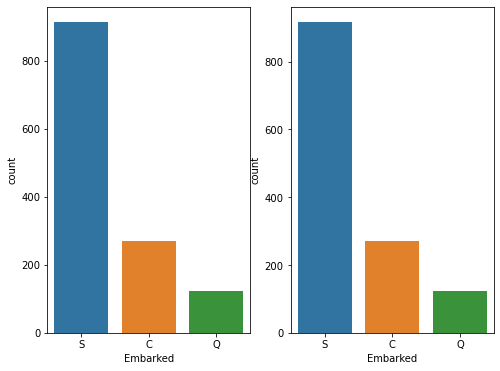

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))
sns.countplot(x='Embarked', data=all_data, ax=ax[0])
print(all_data['Embarked'].value_counts())
# #補值後
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])
sns.countplot(x='Embarked', data=all_data, ax=ax[1])
print(all_data['Embarked'].value_counts())

# 由後往前補

In [9]:
all_data = pd.concat([train_data, test_data], ignore_index=True)


S    914
C    270
Q    123
Name: Embarked, dtype: int64
S    914
C    271
Q    124
Name: Embarked, dtype: int64


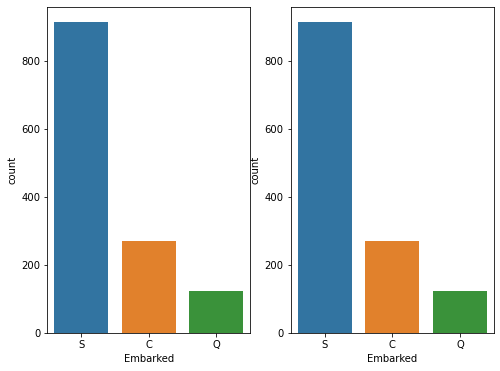

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))
sns.countplot(x='Embarked', data=all_data, ax=ax[0])
print(all_data['Embarked'].value_counts())
# #補值後
all_data['Embarked'] = all_data['Embarked'].fillna(method='pad')
sns.countplot(x='Embarked', data=all_data, ax=ax[1])
print(all_data['Embarked'].value_counts())

# 由後往前補

In [11]:
all_data = pd.concat([train_data, test_data], ignore_index=True)

S    914
C    270
Q    123
Name: Embarked, dtype: int64
S    915
C    271
Q    123
Name: Embarked, dtype: int64


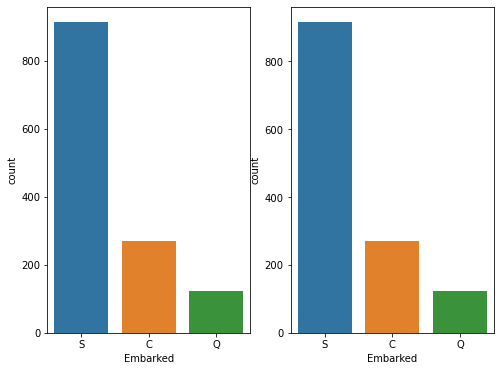

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))
sns.countplot(x='Embarked', data=all_data, ax=ax[0])
print(all_data['Embarked'].value_counts())
# #補值後
all_data['Embarked'] = all_data['Embarked'].fillna(method='bfill')
sns.countplot(x='Embarked', data=all_data, ax=ax[1])
print(all_data['Embarked'].value_counts())

# 由於缺失值只有兩個，難以比較補值後的差異性。